In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [16]:
data = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
minmax = MinMaxScaler()
data['Fare'] = minmax.fit_transform(data[["Fare"]])
data["Age"] = data["Age"].fillna(data['Age'].median())
data["Age"] = minmax.fit_transform(data[["Age"]])

# 0 - Do not have a Cabin 
# 1 - Have a Cabin 
data['Cabin'] = data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
dummies = pd.get_dummies(data[["Sex", "Embarked"]])
data = pd.concat([data, dummies], axis = 1)

Score of training set 0.9297752808988764
Score of testing set 0.888268156424581
Classicication Report                precision    recall  f1-score   support

           0       0.91      0.92      0.92       117
           1       0.85      0.82      0.84        62

    accuracy                           0.89       179
   macro avg       0.88      0.87      0.88       179
weighted avg       0.89      0.89      0.89       179



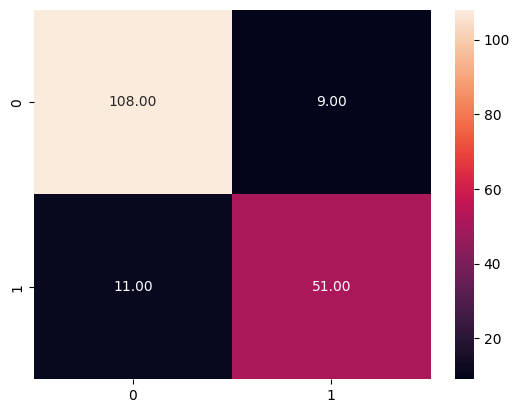

In [17]:
X = data[["Pclass", "Sex_male", "Sex_female", "Age", "SibSp", "Parch", "Cabin", "Embarked_C","Embarked_S","Embarked_Q"]]
y = data['Survived']
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state  = 45) 
pipe1 = RandomForestClassifier(n_estimators = 10)
pipe1.fit(X_train, y_train)
print("Score of training set",pipe1.score(X_train, y_train))
print("Score of testing set", pipe1.score(X_test, y_test))
y_pred = pipe1.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt ="0.2f")

print("Classicication Report ",classification_report(y_test, pipe1.predict(X_test)))

Accuracy: 0.88268156424581
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       117
           1       0.87      0.77      0.82        62

    accuracy                           0.88       179
   macro avg       0.88      0.86      0.87       179
weighted avg       0.88      0.88      0.88       179



<Axes: >

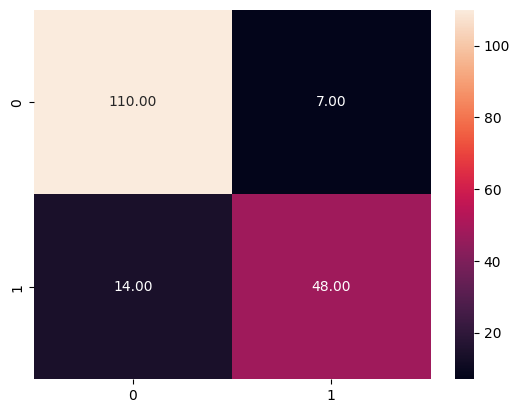

In [18]:
model = GradientBoostingClassifier()
param_grid = {'n_estimators': [100, 200,300], 'learning_rate': [0.001, 0.01,0.1], 'max_depth': [3, 5]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt ="0.2f")

Score of training set 0.827247191011236
Score of testing set 0.8044692737430168
Classicication Report                precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179



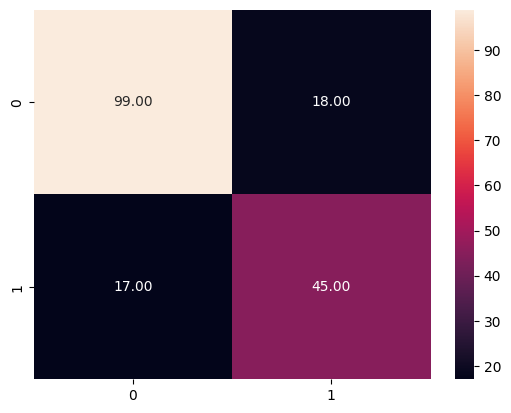

In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Score of training set",knn.score(X_train, y_train))
print("Score of testing set", knn.score(X_test, y_test))
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt ="0.2f")

print("Classicication Report ",classification_report(y_test, knn.predict(X_test)))

Score of training set 0.8019662921348315
Score of testing set 0.8268156424581006
Classicication Report                precision    recall  f1-score   support

           0       0.88      0.85      0.86       117
           1       0.73      0.79      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.83      0.83       179



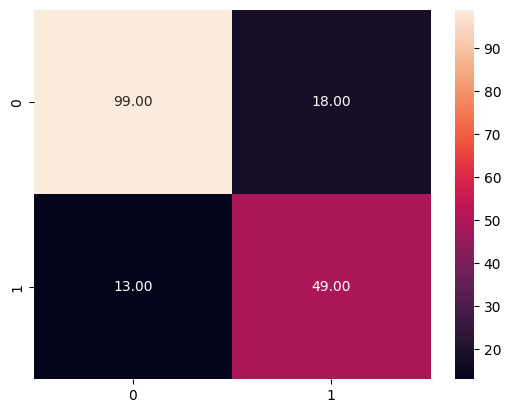

In [20]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score of training set",lr.score(X_train, y_train))
print("Score of testing set", lr.score(X_test, y_test))
y_pred = lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt ="0.2f")

print("Classicication Report ",classification_report(y_test, lr.predict(X_test)))

Score of training set 0.9396067415730337
Score of testing set 0.8547486033519553
Classicication Report                precision    recall  f1-score   support

           0       0.90      0.87      0.89       117
           1       0.77      0.82      0.80        62

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.84       179
weighted avg       0.86      0.85      0.86       179



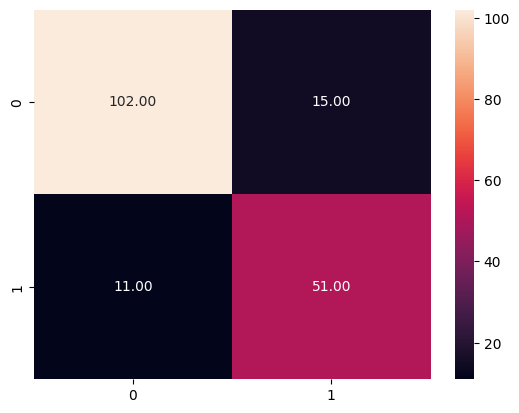

In [21]:
pipe = DecisionTreeClassifier()
pipe.fit(X_train, y_train)

print("Score of training set",pipe.score(X_train, y_train))
print("Score of testing set", pipe.score(X_test, y_test))
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt ="0.2f")

print("Classicication Report ",classification_report(y_test, pipe.predict(X_test)))